## Name : Fawzi abdelnaby elsayed
## Group : One(Mansoura)
## Assignment_2_Day_2

In [1]:
import tensorflow as tf
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import sklearn.metrics as metrics

import matplotlib.pyplot as plt
import seaborn as sns
import io
import numpy as np
import pandas as pd
from tensorflow.keras.datasets import cifar10

## Loading the dataset

In [2]:
# setting class names
class_names=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
#loading the dataset
(x_train,y_train),(x_test,y_test)=cifar10.load_data()

170508288/170498071 [==============================] - 2s 0us/step


## Normalizing the Images

In [3]:
x_train=x_train/255.0
print(x_train.shape)
x_test=x_test/255.0
print(x_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


### Randomly Checking a image

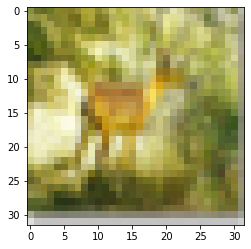

In [4]:
#plt.imshow(x_test[100])
#plt.imshow(x_test[200])
#plt.imshow(x_test[300])
plt.imshow(x_test[500])

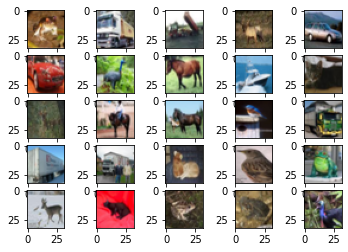

In [5]:
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.imshow(x_train[i])

## Building a Convolutional Neural Network

In [6]:
cifar10_model=tf.keras.models.Sequential()
# First Layer
cifar10_model.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding="same", activation="relu", input_shape=[32,32,3]))
# Second Layer
cifar10_model.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding="same", activation="relu"))
# Max Pooling Layer
cifar10_model.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2,padding='valid'))
# Third Layer
cifar10_model.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding="same", activation="relu"))
# Fourth Layer
cifar10_model.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding="same", activation="relu"))
# Max Pooling Layer
cifar10_model.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2,padding='valid'))
# Flattening Layer
cifar10_model.add(tf.keras.layers.Flatten())
# Droput Layer
cifar10_model.add(tf.keras.layers.Dropout(0.5,noise_shape=None,seed=None))
# Adding the first fully connected layer
cifar10_model.add(tf.keras.layers.Dense(units=128,activation='relu'))
# Output Layer
cifar10_model.add(tf.keras.layers.Dense(units=10,activation='softmax'))

In [7]:
cifar10_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                    

In [8]:
cifar10_model.layers

In [9]:
cifar10_model.compile(loss="sparse_categorical_crossentropy", optimizer="Adam", metrics=["sparse_categorical_accuracy"])

## Fit Model (Training)

In [10]:
history= cifar10_model.fit(x_train,y_train,epochs=5)

Epoch 1/5
1563/1563 [==============================] - 29s 13ms/step - loss: 1.4093 - sparse_categorical_accuracy: 0.4878
Epoch 2/5
1563/1563 [==============================] - 18s 11ms/step - loss: 0.9907 - sparse_categorical_accuracy: 0.6482
Epoch 3/5
1563/1563 [==============================] - 18s 11ms/step - loss: 0.8393 - sparse_categorical_accuracy: 0.7017
Epoch 4/5
1563/1563 [==============================] - 18s 11ms/step - loss: 0.7506 - sparse_categorical_accuracy: 0.7348
Epoch 5/5
1563/1563 [==============================] - 18s 11ms/step - loss: 0.6852 - sparse_categorical_accuracy: 0.7573


In [11]:
_,accurecy_train=cifar10_model.evaluate(x_train,y_train)
_,accurecy_test=cifar10_model.evaluate(x_test,y_test)
print("accurecy_train: ", accurecy_train*100)
print("accurecy_test: ", accurecy_test*100)

313/313 [==============================] - 2s 6ms/step - loss: 0.6885 - sparse_categorical_accuracy: 0.7580
accurecy_train:  82.58200287818909
accurecy_test:  75.80000162124634


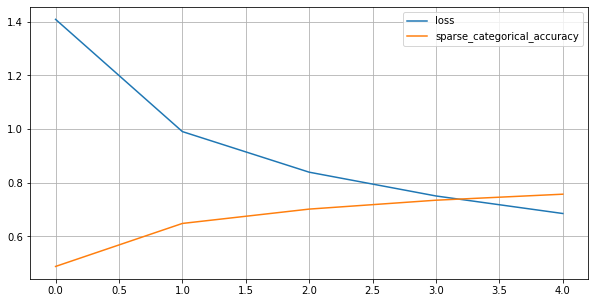

In [12]:
learning_data = pd.DataFrame(history.history)
learning_data.plot(figsize=(10,5))
plt.grid(True)
plt.show()